According to http://extwprlegs1.fao.org/docs/pdf/cam143042.pdf, p3 (11/58)

2008:
- inland fishing: 365,000 tonnes
- marine fishing: 66,000 tonnes
- inland aquaculture: 39,025 tonnes
- marine aquaculture: 75 tonnes
- trade and export: 25,000 tonnes


According to FAO 2004 p1

2001:
- Kampot: 6,430 tonnes
- Sihanoukville: 17,065 tonnes
- Koh Kong: 17,400 tonnes
- Kep: 1,063 tonnes


According to FAO 2017 p65

700 000 tonnes of catches

In [39]:
import os
import pandas as pd
import geopandas as gpd

# Marine fishing: evaluate ocean_facing_intensity of communes

### Load

<AxesSubplot:>

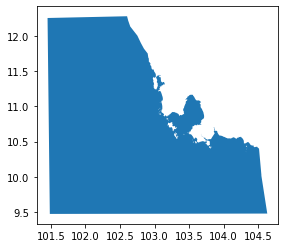

In [40]:
ocean = gpd.read_file(os.path.join("..", "..", "Raw", "Topography", "ocean_4326.geojson"))
ocean.plot()

<AxesSubplot:>

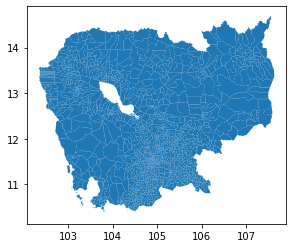

In [41]:
#communes = gpd.read_file(os.path.join("..", "..", "Structured", "Admin", "level3_2013.shp"))
communes = gpd.read_file(os.path.join("..", "..", "Structured", "Admin", "communes_2021_treated.geojson"))
communes['COMMUNE'] = communes['COMMUNE'].astype(str).str.zfill(6)
communes['DISTRICT'] = communes['DISTRICT'].astype(str).str.zfill(4)
communes['PROVINCE'] = communes['PROVINCE'].astype(str).str.zfill(2)
communes.plot()

In [42]:
communes.head()

,ORDER_,COMMUNE,COMMUNE_NA,DISTRICT,DISTRICT_N,PROVINCE,PROVINCE_N,geometry
0,1,160801,Ta Veaeng Leu,1608,Ta Veaeng,16,Ratanak Kiri,"MULTIPOLYGON (((107.45191 14.52510, 107.45251 ..."
1,2,190303,Santepheap,1903,Siem Pang,19,Stung Treng,"MULTIPOLYGON (((106.34129 14.44058, 106.34341 ..."
2,3,190305,Tma Kaev,1903,Siem Pang,19,Stung Treng,"MULTIPOLYGON (((106.18691 14.34771, 106.18886 ..."
3,4,160802,Ta Veaeng Kraom,1608,Ta Veaeng,16,Ratanak Kiri,"MULTIPOLYGON (((106.99350 14.35621, 106.99428 ..."
4,5,220405,Ou Smach,2204,Krong Samraong,22,Otdar Meanchey,"MULTIPOLYGON (((103.63281 14.40535, 103.63494 ..."


### Intersect communes with ocean to get ocean-facing communes

In [43]:
buffer_level = 0.01
buffered_ocean = gpd.GeoDataFrame({"geometry":ocean.buffer(buffer_level)})
buffered_ocean.crs = {'init': 'epsg:4326'}

C:\Users\colon\AppData\Local\Temp/ipykernel_6496/322166543.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_ocean = gpd.GeoDataFrame({"geometry":ocean.buffer(buffer_level)})
C:\Users\colon\Anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

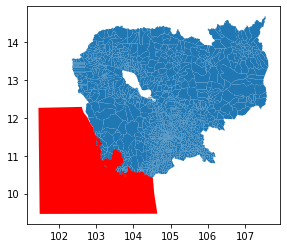

In [44]:
ax = communes.plot()
buffered_ocean.plot(ax=ax, color="red")

C:\Users\colon\AppData\Local\Temp/ipykernel_6496/38190648.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  ocean_facing_communes = gpd.overlay(communes, buffered_ocean, how="intersection")


<AxesSubplot:>

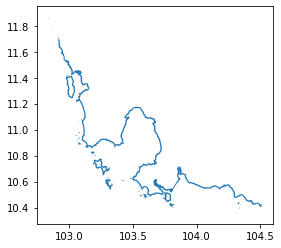

In [45]:
# a bit slow
ocean_facing_communes = gpd.overlay(communes, buffered_ocean, how="intersection")
ocean_facing_communes.plot()

In [46]:
# Build the marine_facing_intensity of each piece of intersection, which correspond to the area
ocean_facing_communes['marine_facing_intensity'] = ocean_facing_communes.area

# Then aggregate this indicator per commune
ocean_facing_communes = ocean_facing_communes.groupby('COMMUNE')['marine_facing_intensity'].sum()
print(ocean_facing_communes.shape[0])
ocean_facing_communes.head()

53


C:\Users\colon\AppData\Local\Temp/ipykernel_6496/3535707626.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ocean_facing_communes['marine_facing_intensity'] = ocean_facing_communes.area


COMMUNE
070602    0.000392
070613    0.000182
070614    0.000682
070616    0.000028
070701    0.000643
Name: marine_facing_intensity, dtype: float64

<AxesSubplot:>

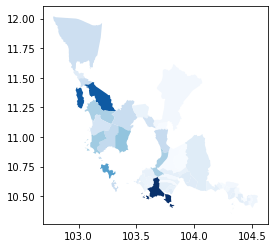

In [47]:
# Add this indicator into the commune table
communes['marine_facing_intensity'] = communes['COMMUNE'].map(ocean_facing_communes)
communes.plot(column="marine_facing_intensity", cmap='Blues')

# River fishing: evaluate river_facing_intensity of communes

<AxesSubplot:>

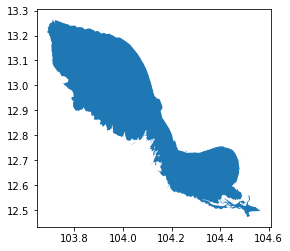

In [48]:
tonlesap = gpd.read_file(os.path.join("..", "..", "Raw", "Topography", "tonlesap_4326.geojson"))
tonlesap.plot()

<AxesSubplot:>

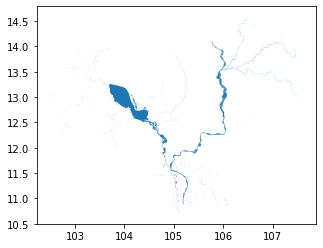

In [49]:
river = gpd.read_file(os.path.join("..", "..", "Raw", "Topography", "river_4326.geojson"))
river.plot()

### Interset with river layer to evaluate river-facing communes

C:\Users\colon\AppData\Local\Temp/ipykernel_6496/31971871.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_river = gpd.GeoDataFrame({"geometry": river[river.area>cutoff_small_river].buffer(buffer_level)})
C:\Users\colon\AppData\Local\Temp/ipykernel_6496/31971871.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_river = gpd.GeoDataFrame({"geometry": river[river.area>cutoff_small_river].buffer(buffer_level)})
C:\Users\colon\Anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyp

<AxesSubplot:>

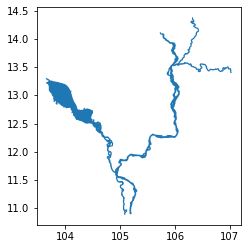

In [50]:
# Simplify and buffer
cutoff_small_river = 0.1
buffer_level = 0.01
buffered_river = gpd.GeoDataFrame({"geometry": river[river.area>cutoff_small_river].buffer(buffer_level)})
buffered_river.crs = {'init': 'epsg:4326'}
buffered_river.plot()

C:\Users\colon\AppData\Local\Temp/ipykernel_6496/1787371978.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_tonlesap = gpd.GeoDataFrame({"geometry": tonlesap.buffer(tonlesap_buffer)})
C:\Users\colon\Anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

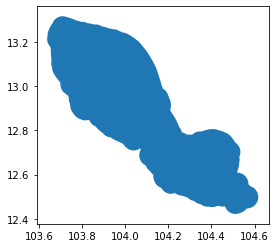

In [51]:
# tonlesap does not buffer enough, add it separately
tonlesap_buffer = 0.05
buffered_tonlesap = gpd.GeoDataFrame({"geometry": tonlesap.buffer(tonlesap_buffer)})
buffered_tonlesap.crs = {'init': 'epsg:4326'}
buffered_tonlesap.plot()

<AxesSubplot:>

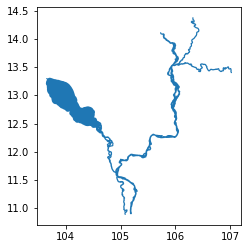

In [52]:
#merged_both
buffered_river_lake = pd.concat([buffered_river, buffered_tonlesap])
buffered_river_lake['col'] = 0
buffered_river_lake.dissolve(by='col')
buffered_river_lake.plot()

C:\Users\colon\AppData\Local\Temp/ipykernel_6496/3679275391.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  river_facing_communes = gpd.overlay(communes, buffered_river_lake, how="intersection")


<AxesSubplot:>

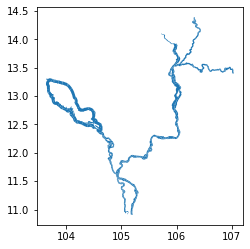

In [53]:
# quite slow
river_facing_communes = gpd.overlay(communes, buffered_river_lake, how="intersection")
river_facing_communes.plot()

C:\Users\colon\AppData\Local\Temp/ipykernel_6496/1819800386.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  river_facing_communes['river_facing_intensity'] = river_facing_communes.area


329


<AxesSubplot:>

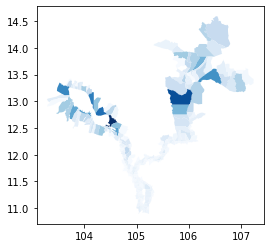

In [54]:
# Build the river_facing_intensity of each piece of intersection, which correspond to the area
river_facing_communes['river_facing_intensity'] = river_facing_communes.area

# Then aggregate this indicator per commune
river_facing_communes = river_facing_communes.groupby('COMMUNE')['river_facing_intensity'].sum()
print(river_facing_communes.shape[0])

# Add this indicator into the commune table
communes['river_facing_intensity'] = communes['COMMUNE'].map(river_facing_communes)
communes.plot(column="river_facing_intensity", cmap='Blues')

# Allocate fishing production

inland_total_prod 601611.3592852585 marine_total_prod 98388.64071474154


<AxesSubplot:>

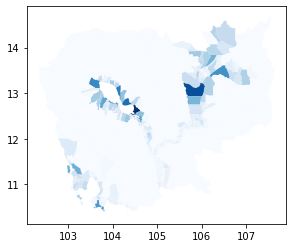

In [55]:
data = {
    2017: {
        'total': 700000
    },
    2008: {
        'inland_fishing': 365000,
        'marine_fishing': 66000,
        'inland_aquaculture': 39025,
        'marine_aquaculture': 75
    }
}
data[2008]['total'] = sum(data[2008].values())
communes['fish_prod'] = 0
inland_total_prod = data[2017]['total'] / data[2008]['total'] * (data[2008]['inland_fishing'] + data[2008]['inland_aquaculture'])
marine_total_prod = data[2017]['total'] / data[2008]['total'] * (data[2008]['marine_fishing'] + data[2008]['marine_aquaculture'])
print("inland_total_prod", inland_total_prod, "marine_total_prod", marine_total_prod)
inland_fishing = communes['river_facing_intensity'] / communes['river_facing_intensity'].sum() * inland_total_prod
marine_fishing = communes['marine_facing_intensity'] / communes['marine_facing_intensity'].sum() * marine_total_prod
communes['fish_prod'] = inland_fishing.fillna(0) + marine_fishing.fillna(0)
communes.plot(column="fish_prod", cmap='Blues')

# Export

In [56]:
filename = os.path.join('..', "..", "Structured", "Supply", "FishingForestry", "fishing_per_commune.csv")
communes.drop(columns='geometry').to_csv(filename, index=False)